<a href="https://colab.research.google.com/github/Zanale10/DATASCIENCE-101-TEST/blob/main/MedicalNo_show_ML_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DSA 6101:PRINCIPLES OF DATA SCIENCE


GROUP 5


JOHN ALLAN-25/04382


ZANALE RAQUEL-25/01875


HAKIZIMANA SONIA-25/03907


STEPHEN LEKUCHULA-

Downloading data set from Kaggle

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("joniarroba/noshowappointments")

print("Path to dataset files:", path)

100%|██████████| 2.40M/2.40M [00:00<00:00, 101MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/joniarroba/noshowappointments/versions/5


In [4]:
import os

path = "/root/.cache/kagglehub/datasets/joniarroba/noshowappointments/versions/5"
os.listdir(path)



['KaggleV2-May-2016.csv']

In [5]:
import pandas as pd

df = pd.read_csv(path + "/KaggleV2-May-2016.csv")
df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No




**Clearly define the problem and business objectives.**

 The county health department is experiencing high rates of patient no-shows at scheduled clinic appointments, leading to inefficient use of medical resources, increased waiting times, and decreased access to care. This project aims to develop a machine learning model that can accurately predict whether a patient will show up for their scheduled appointment, using historical appointment data. By identifying high-risk patients in advance, the healthcare system can take proactive measures to reduce no-show rates, optimize clinic operations, and improve patient outcomes.

**Primary Business objectives**
To build and deploy a machine learning model that predicts whether a patient will attend
secondary:


1.Efficiency improvement in scheduling-not considering availability of the patient


2.policy descions around descions so that incase the patient doesnt show up there is a guideline


3.Reminders shared proactively to all the patients.

**Secondary Business Objectives**


 To improve resource allocation, and enhance overall efficiency and quality of healthcare service delivery.

**Explain the potential impact of your model on the healthcare system and stakeholders.**

1.Patients-The model has the potential to greatly improve patients health by sending timely reminders for appointments, check-ups, or medication refills. These gentle nudges help ensure that patients get the care they need when they need it reducing the risk of complications from missed or delayed visits.


2.County health department-When patients report on time for services, it leads to better planning and optimized use of available resources such as medications, staff time, and clinic space. This increased efficiency not only helps in reducing wastage but also improves service coverage.


3.health care providers-For doctors and nurses timely patient attendance improves productivity as it reduces the stress of managing unpredictable schedules.


4.IT team/Personell-intergrate predictive tools with existing health information systems which ensures continuity of data.


**Identify key performance indicators (KPIs) for project success.**


**MODEL KPIs**

1.Accuracy-use total proportions to measure how accurate it was based on the total

$Accuracy = \frac{\text{Correct Predictions}}{\text{Total Predictions}}$



2.precision-how precise were the no shows compared to predicted that is Out of all patients the model predicted as no-shows, how many truly didn’t show up?

**Precision** = $\frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}}$


 where:
True Positives (TP) = predicted no-show, actually no-show

False Positives (FP) = predicted no-show, actually showed up

False Negatives (FN) = predicted show-up, actually no-show



3.Recall (Sensitivity) – How many actual no-shows were correctly predicted.

**Recall (Sensitivity)** = $\frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}}$


4.F1-Score – This metric helps strike a balance between precision and recall, making sure the model performs well on both sides.For example, if the model predicts many patients as potential no-shows, but most of them would have actually shown up, that’s low precision we’ve wrongly flagged patients and could strain trust in the system.

**F1-Score** = $\frac{2 \times \text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}$


5.No show rate-This refers to the percentage of scheduled patients who do not show up for their appointments.Reduced rates signify better performance

6. Number of Patients per Doctor-Shows the average number of patients each doctor handles. Affected by no-shows, this metric helps measure doctor workload and planning.

7. Patient Satisfaction via Surveys
8.Model Adoption Rate by Facilities-The more the users embracing the models use in facilities after deployment the better the success rate.



 *Data Understanding*


The dataset consists of Data taken from a medical Health Centre in Brazil. It contains records of medical appointments and shows whether patients showed up for there appointments.

In [6]:
print(df.dtypes)#Data Types


PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object


In [7]:
print(df.isnull().sum())#Check for missing values


PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64


In [8]:
# Check for duplicate rows
duplicates = df[df.duplicated()]
print("Number of duplicate rows:", len(duplicates))
print(duplicates)


Number of duplicate rows: 0
Empty DataFrame
Columns: [PatientId, AppointmentID, Gender, ScheduledDay, AppointmentDay, Age, Neighbourhood, Scholarship, Hipertension, Diabetes, Alcoholism, Handcap, SMS_received, No-show]
Index: []


In [9]:
print(df.describe())


          PatientId  AppointmentID            Age    Scholarship  \
count  1.105270e+05   1.105270e+05  110527.000000  110527.000000   
mean   1.474963e+14   5.675305e+06      37.088874       0.098266   
std    2.560949e+14   7.129575e+04      23.110205       0.297675   
min    3.921784e+04   5.030230e+06      -1.000000       0.000000   
25%    4.172614e+12   5.640286e+06      18.000000       0.000000   
50%    3.173184e+13   5.680573e+06      37.000000       0.000000   
75%    9.439172e+13   5.725524e+06      55.000000       0.000000   
max    9.999816e+14   5.790484e+06     115.000000       1.000000   

        Hipertension       Diabetes     Alcoholism        Handcap  \
count  110527.000000  110527.000000  110527.000000  110527.000000   
mean        0.197246       0.071865       0.030400       0.022248   
std         0.397921       0.258265       0.171686       0.161543   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       

 The dataset is comprised of 110527 records of 14 varibles  patientID,appointmentID,Gender,Schedule day, Appointment Day,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,
Handicap & SMS_received
 Those variables can be classified into:
 • unique identifiers for the patient (patientID) and appointment(appointmentID),
 and
 • dates for ScheduledDay and AppointmentDay. These are respectively the date and time
 when the appointment was scheduled and the appointment day The scheduledDay has
 time(hh:mm:ss) specified and AppointmentDay has no time specified (default 00:00:00).
 • Ageis a continuous variable with a minimum 0f-1 which looks like a data entry error whereas
 the neighborhood is a string containing the patients’ residence.
 • The remaining are dichotomous variables. Gender is either F or M and No-show is Yes or
 No. The rest of the variables has 0 or 1 which represents absence or presence of a given
 condition
 The dataset has no duplicate values nor missing values. Let us explore further by looking at
 distribution of the categorical values.

 The age distribution ranges from -1 to 115 years Most patients fall between 18 (25th percentile) and 55 (75th percentile), with a median and mean of approximately 37 years. This suggests more oung and middle aged patients.
The cases considered as high risk in this case (Hipertension,Diabetes,     Alcoholism) are not as high ,Hipertension is recorded as the highest with a mean of 19.7%   
Only 32% of the patients recorded having received SMS reminders


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [11]:
 from collections import Counter

In [12]:
print(df.columns.tolist())


['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay', 'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show']


In [13]:
df.columns = df.columns.str.strip()


In [14]:
from collections import Counter

classes = Counter(df['No-show'].values)
print(classes)



Counter({'No': 88208, 'Yes': 22319})


In [15]:
 classes.most_common()

[('No', 88208), ('Yes', 22319)]

In [16]:
class_dist = pd.DataFrame(classes.most_common(), columns=['Class', 'Num_Observations'])


In [17]:
class_dist

,Class,Num_Observations
0,No,88208
1,Yes,22319


In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your dataframe is called df
correlation_matrix = df.corr(numeric_only=True)


In [19]:
print(correlation_matrix)


               PatientId  AppointmentID       Age  Scholarship  Hipertension  \
PatientId       1.000000       0.004039 -0.004139    -0.002880     -0.006441   
AppointmentID   0.004039       1.000000 -0.019126     0.022615      0.012752   
Age            -0.004139      -0.019126  1.000000    -0.092457      0.504586   
Scholarship    -0.002880       0.022615 -0.092457     1.000000     -0.019729   
Hipertension   -0.006441       0.012752  0.504586    -0.019729      1.000000   
Diabetes        0.001605       0.022628  0.292391    -0.024894      0.433086   
Alcoholism      0.011011       0.032944  0.095811     0.035022      0.087971   
Handcap        -0.007916       0.014106  0.078033    -0.008586      0.080083   
SMS_received   -0.009749      -0.256618  0.012643     0.001194     -0.006267   

               Diabetes  Alcoholism   Handcap  SMS_received  
PatientId      0.001605    0.011011 -0.007916     -0.009749  
AppointmentID  0.022628    0.032944  0.014106     -0.256618  
Age          

From the descriptive Statistics we can establish the following insights;
The data was collected from a sample of 110527 patients.

From the correlation matrix we are able to deduce that age and the high risk conditions have a high correlation ;age and Hipertension are at 0.5,age and Diabetes are at 0.2, also the chances of a patient having more than one high risk condition is observed as high with Hipertension and Diabetes at 0.4 correlation.Most of the other variables have near zero values suggesting low to no correlation

Graphical Visualization

In [ ]:
 # Automatically detect binary columns
 dichotomous_cols = [col for col in df.columns if df[col].nunique() == 2]
 4
# Adjust layout
 cols_per_row = 4
 rows = 2
 plots_per_page = cols_per_row * rows
 # Split into chunks
 for i in range(0, len(dichotomous_cols), plots_per_page):
 subset = dichotomous_cols[i:i + plots_per_page]
 fig, axes = plt.subplots(rows, cols_per_row, figsize=(cols_per_row * 5,␣
 ↪rows * 4))
 axes = axes.flatten()
 for j, col in enumerate(subset):
 ax = axes[j]
 count_plot = sns.countplot(data=df, x=col, hue=col, palette='pastel',␣
 ↪legend=False, ax=ax)
 ax.set_title(f'Distribution of {col}')
 ax.set_xlabel(col)
 ax.set_ylabel('Count')
 ax.grid(True, axis='y')
 # Add count labels on each bar
 for container in count_plot.containers:
 count_plot.bar_label(container, fmt='%d', label_type='edge',␣
 ↪fontsize=9, padding=2)
 # Hide any unused subplots
 for k in range(len(subset), len(axes)):
 fig.delaxes(axes[k])
 plt.tight_layout()
 plt.show()

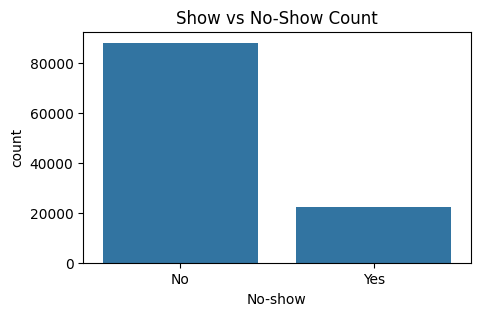

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# No-show counts
plt.figure(figsize=(5, 3))  # Set figure size first
sns.countplot(data=df, x='No-show')
plt.title('Show vs No-Show Count')
plt.show()


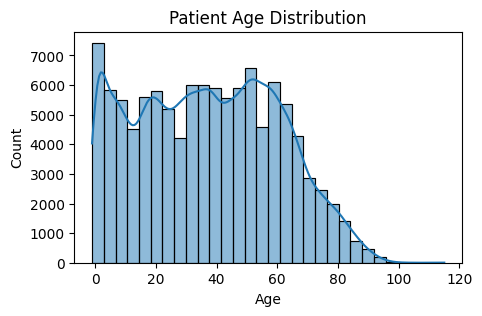

In [21]:
# Age distribution
plt.figure(figsize=(5, 3))  # Set figure size first
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Patient Age Distribution')
plt.show()

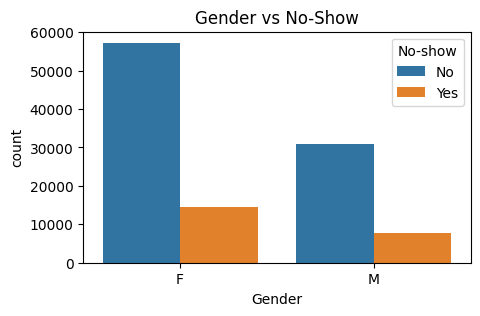

In [22]:
# Gender breakdown
plt.figure(figsize=(5, 3))  # Set figure size first
sns.countplot(data=df, x='Gender', hue='No-show')
plt.title('Gender vs No-Show')
plt.show()

*Data Preparation*

In [23]:
 df.rename(columns={'Result':'Class'},inplace=True)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [25]:
df['No-show'] = df['No-show'].map({'No': 0, 'Yes': 1})


In [26]:
 df['No-show'].unique()

array([0, 1])

In [27]:
 from sklearn.model_selection import train_test_split

In [28]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()
label_encoders = {}

for col in df_encoded.columns[:30]:
    if df_encoded[col].dtype == 'object':
        le = LabelEncoder()
        df_encoded[col] = le.fit_transform(df_encoded[col])
        label_encoders[col] = le

X = df_encoded.iloc[:, 0:30].values.astype(int)


In [29]:
X

array([[ 29872499824296,         5642903,               0, ...,
                      0,               0,               0],
       [558997776694438,         5642503,               1, ...,
                      0,               0,               0],
       [  4262962299951,         5642549,               0, ...,
                      0,               0,               0],
       ...,
       [ 15576631729893,         5630692,               0, ...,
                      0,               1,               0],
       [ 92134931435557,         5630323,               0, ...,
                      0,               1,               0],
       [377511518121127,         5629448,               0, ...,
                      0,               1,               0]])

In [30]:
y = df['No-show'].values.astype(int)


In [31]:
y

array([0, 0, 0, ..., 0, 0, 0])

*USING LOGISTIC MODEL REGRESSION*

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
 test_size=0.2,
 random_state=42)

In [33]:
import numpy as np


In [34]:
np.save("X_train", X_train)
np.save("X_test", X_test)
np.save("y_train", y_train)
np.save("y_test", y_test)

In [35]:
X_train, y_train = np.load("X_train.npy"), np.load("y_train.npy")

In [36]:
 X_test, y_test = np.load("X_test.npy"), np.load("y_test.npy")

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,precision_score,recall_score,f1_score


In [38]:
from sklearn.metrics import precision_recall_fscore_support


In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
model = LogisticRegression(class_weight='balanced', solver='liblinear', max_iter=1000)


In [41]:
import wandb

In [42]:
import time

In [43]:
def train_eval_pipeline(model, train_data, test_data, name):
    import time
    import wandb
    from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report

    # Initialize Weights & Biases
    wandb.init(project="Medical Noshows", name=name)

    # Segregate the datasets
    (X_train, y_train) = train_data
    (X_test, y_test) = test_data

    # Train the model and log the metrics
    start = time.time()
    model.fit(X_train, y_train)
    end = time.time()

    train_time = end - start

    prediction = model.predict(X_test)

    wandb.log({
        "accuracy": accuracy_score(y_test, prediction) * 100.0,
        "precision": precision_recall_fscore_support(y_test, prediction, average='macro')[1],
        "Train Time": train_time
    })

    print("Accuracy Score of the logistic regression classifier with the default hyperparameter values: {:.2f}%".format(
        accuracy_score(y_test, prediction) * 100.0))
    print("\n---- Classification report of the Logistic regression classifier ----\n")
    print(classification_report(y_test, prediction, target_names=["Showed Up", "No Show"]))#0-Showed up 1-No show


In [44]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()


In [ ]:
train_eval_pipeline(logreg, (X_train, y_train), (X_test, y_test), "Logistic Regression")

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter:

The logistic Regression model has a 80% Accuracy but it does not predict any no shows,According to the model most of the recordings are show ups

*USING RANDOM TREES METHOD*

In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Step 1: Load dataset
df = pd.read_csv(path + "/KaggleV2-May-2016.csv")

# Step 2: Drop ID columns and define X, y
df_cleaned = df.drop(['PatientId', 'AppointmentID'], axis=1)
X = df_cleaned.drop('No-show', axis=1)
y = df_cleaned['No-show'].map({'No': 0, 'Yes': 1})

# Step 3: Reduce cardinality of Neighbourhood
top_neighbourhoods = X['Neighbourhood'].value_counts().nlargest(20).index
X['Neighbourhood'] = X['Neighbourhood'].apply(lambda x: x if x in top_neighbourhoods else 'Other')

# Step 4: Extract features from datetime columns
X['ScheduledDay'] = pd.to_datetime(X['ScheduledDay'])
X['AppointmentDay'] = pd.to_datetime(X['AppointmentDay'])
X['ScheduledWeekday'] = X['ScheduledDay'].dt.dayofweek
X['AppointmentWeekday'] = X['AppointmentDay'].dt.dayofweek
X['WaitingDays'] = (X['AppointmentDay'] - X['ScheduledDay']).dt.days
X = X.drop(['ScheduledDay', 'AppointmentDay'], axis=1)

# Step 5: Recalculate column types AFTER cleaning
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()

# Step 6: Define imputers and encoder
num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')
cat_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Step 7: Build preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', num_imputer),
            ('scaler', StandardScaler())
        ]), numerical_cols),

        ('cat', Pipeline([
            ('imputer', cat_imputer),
            ('encoder', cat_encoder)
        ]), categorical_cols)
    ])

# Step 8: Transform your data
X_preprocessed = preprocessor.fit_transform(X)


In [ ]:
X_preprocessed

 PCA (Principal Component Analysis) is required for this model as the system is slow and kept on crashing crashing due to high dimensionality.

In [ ]:
from sklearn.decomposition import PCA

# Reduce dimensionality to, say, 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_preprocessed)

# Check how much variance each component explains
print(pca.explained_variance_ratio_)


In [ ]:
# Keep enough components to explain ~95% of the variance
pca = PCA(n_components=0.95)  # Keep enough components to explain 95% of variance
X_pca = pca.fit_transform(X_preprocessed)

print(f"Number of components selected: {pca.n_components_}")
print(f"Explained variance by each: {pca.explained_variance_ratio_}")


*Modelling*

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Train a model
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))


The model is approximately 77% accurate

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report


In [ ]:
print("Threshold-based metrics:")
print(f"Accuracy:  {accuracy_score(y_test, y_pred):.3f}")
print(f"Precision: {precision_score(y_test, y_pred):.3f}")
print(f"Recall:    {recall_score(y_test, y_pred):.3f}")
print(f"F1-score:  {f1_score(y_test, y_pred):.3f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


The model isn’t good enough at predicting No-shows since Out of all patients the model predicted as no-shows, how many truly didn’t show up(precision) are only correctly predicted 37% and How many actual no-shows were correctly predicted(recall) is at 21%
However it well predicts the patients that show up.

In [ ]:
from sklearn.metrics import roc_auc_score

# Predict class probabilities (for class 1 = No-show)
y_proba = clf.predict_proba(X_test)[:, 1]

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_proba)
print(f"ROC-AUC Score: {roc_auc:.3f}")


 Randomly picking one patient who actually missed their appointment and one who showed up, there's about a 69.2% chance that the model will correctly give a higher "no-show" score to the one who missed it

*Evaluating*

Deploying

In [ ]:
: pip install kaggle

In [ ]:
!pip install kaggle   # ✅ correct


In [ ]:
import streamlit as st
import pandas as pd
import pickle

# Load model
with open("no_show_model.pkl", "rb") as f:
    model = pickle.load(f)

# Title
st.title("No-Show Medical Appointment Predictor")

st.write("Fill in the details below:")

Age = st.slider("Age", 0, 100, 25)
Scholarship = st.selectbox("Scholarship", [0, 1])
Hipertension = st.selectbox("Hypertension", [0, 1])
Diabetes = st.selectbox("Diabetes", [0, 1])
Alcoholism = st.selectbox("Alcoholism", [0, 1])
Handcap = st.selectbox("Handcap", [0, 1])
SMS_received = st.selectbox("SMS Received", [0, 1])
Gender = st.selectbox("Gender", ['Female', 'Male'])
Gender = 0 if Gender == 'Female' else 1

input_data = pd.DataFrame({
    'Gender': [Gender],
    'Age': [Age],
    'Scholarship': [Scholarship],
    'Hipertension': [Hipertension],
    'Diabetes': [Diabetes],
    'Alcoholism': [Alcoholism],
    'Handcap': [Handcap],
    'SMS_received': [SMS_received]
})

if st.button("Predict"):
    prediction = model.predict(input_data)[0]
    result = "❌ Will NOT show up" if prediction == 1 else "✅ Will show up"
    st.success(f"Prediction: {result}")
